## Importing the libraries


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np




## Load the DataSets


In [5]:
data_generator = ImageDataGenerator( rescale =1./255,
                                    rotation_range=10,
                                     zoom_range=0.1,
                                      horizontal_flip = True,
                                    validation_split=0.25 )

train_data = data_generator.flow_from_directory(
    'h:/ML/Project/Cancer Detection/dataset',  
    target_size=(224, 224),                    
    batch_size=32,
    class_mode='binary',                      
    subset='training',
    shuffle=True
)
val_generator = data_generator.flow_from_directory(
    'h:/ML/Project/Cancer Detection/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 191 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


## Data Exploiting

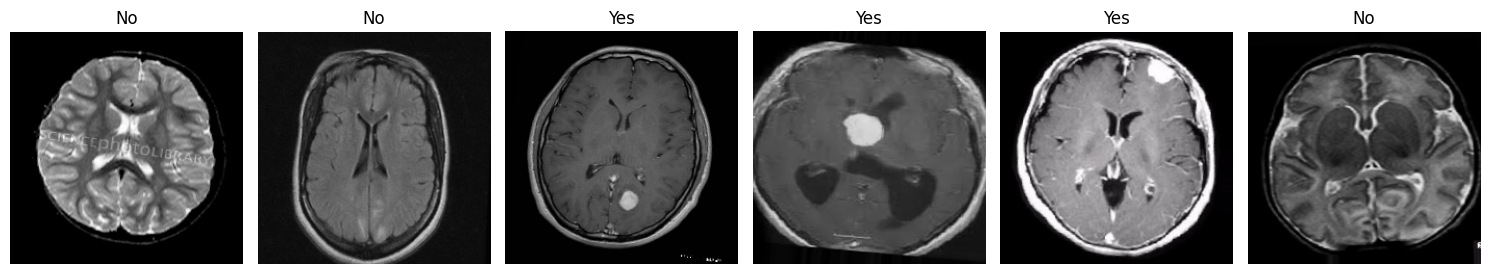

In [6]:
import matplotlib.pyplot as plt

images, labels = next(train_data)
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(2,6,i+1)
    plt.imshow(images[i])
    label = 'Yes' if labels[i]==1 else 'No'
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()    

In [32]:
print("Labels:", labels)
print("Labels (int):", labels.astype(int))
print("Unique labels:", unique_labels)
print("Labels counts:", labels_counts)

Labels: [1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0.]
Labels (int): [1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0]
Unique labels: [0 1]
Labels counts: [14 18]


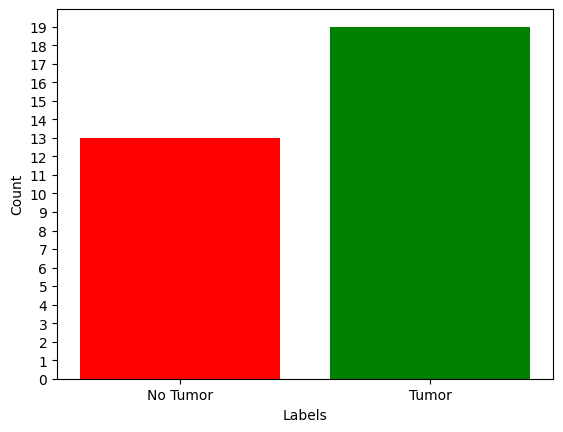

In [7]:
unique_labels, labels_counts = np.unique(labels.astype(int), return_counts=True)
plt.bar(unique_labels, labels_counts, color=('red', 'green'))
plt.xticks(unique_labels, ['No Tumor', 'Tumor'])
plt.xlabel('Labels')
plt.yticks(np.arange(0, max(labels_counts)+1, 1))
plt.ylabel('Count')
plt.show()

## Building the model

In [8]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

C:\Users\hasin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    train_data,
    validation_data=val_generator,
    epochs=15
)

C:\Users\hasin\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5612 - loss: 1.1420 - val_accuracy: 0.6935 - val_loss: 0.6526
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 913ms/step - accuracy: 0.7907 - loss: 0.5217 - val_accuracy: 0.7258 - val_loss: 0.5338
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 988ms/step - accuracy: 0.7884 - loss: 0.4777 - val_accuracy: 0.7258 - val_loss: 0.6203
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 875ms/step - accuracy: 0.7588 - loss: 0.4562 - val_accuracy: 0.6935 - val_loss: 0.5538
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7749 - loss: 0.4499 - val_accuracy: 0.7581 - val_loss: 0.5765
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 865ms/step - accuracy: 0.8522 - loss: 0.4273 - val_accuracy: 0.7258 - val_loss: 0.5259
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 901ms/step - accuracy: 0.8339 - loss: 0.4257 - val_accuracy: 0.7581 - val_loss: 0.5405
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 897ms/step - accuracy: 0.8049 - loss: 0.3680 - val_accuracy: 0.7581 - val_loss: 0.53

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,890,373 (136.91 MB)

 Trainable params: 11,963,457 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,926,916 (91.27 MB)

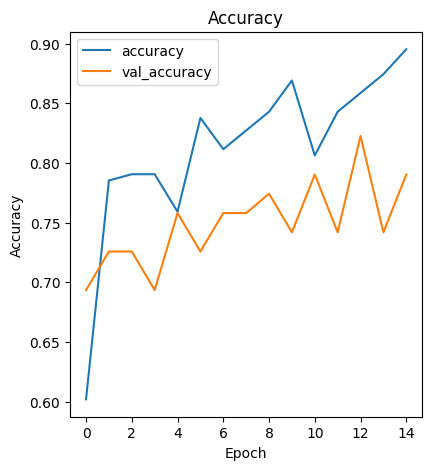

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show() 
#overfitting_problem